   Delivery Time  Sorting Time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10


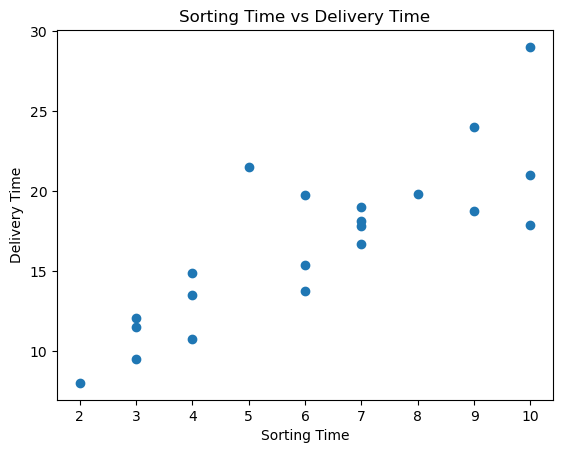

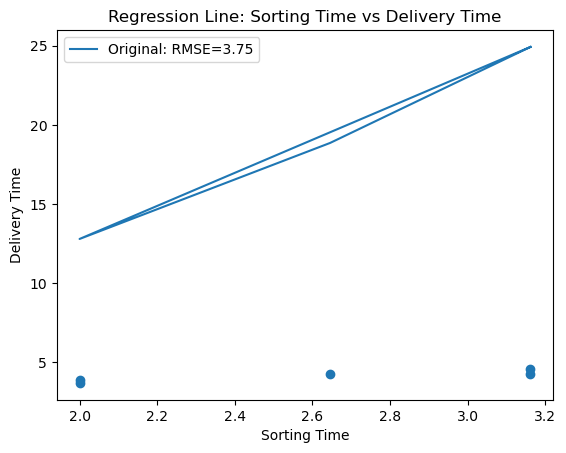

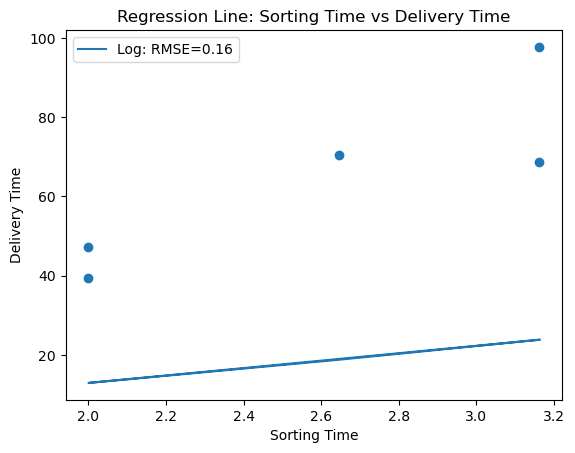

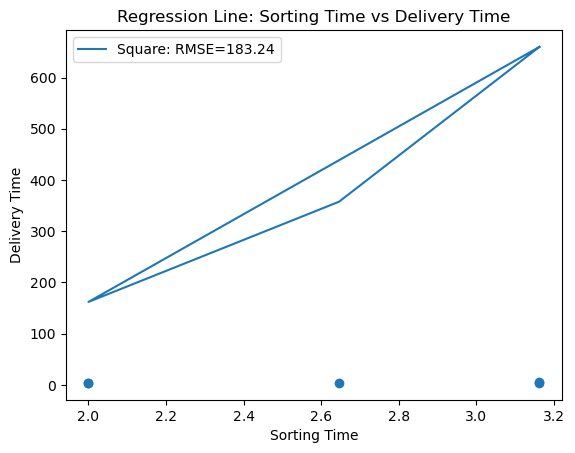

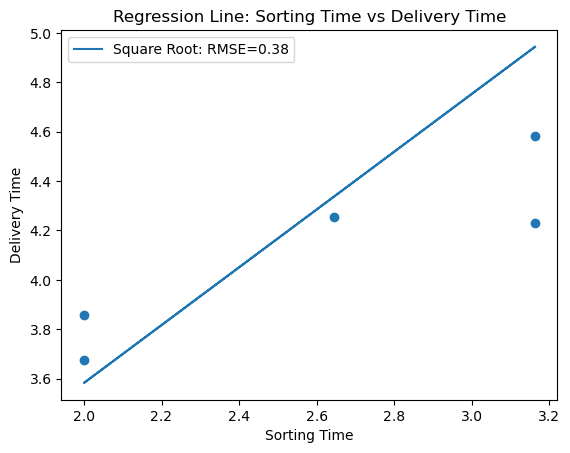

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

file_path = r"C:\Users\Owner\OneDrive\Desktop\data science assingment\simple linear regression\delivery_time.csv"
df = pd.read_csv(file_path)

print(df.head())

plt.scatter(df['Sorting Time'], df['Delivery Time'])
plt.title('Sorting Time vs Delivery Time')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()


X_orig = df[['Sorting Time']]
y_orig = df['Delivery Time']


X_log = np.log(X_orig)
y_log = np.log(y_orig)


X_square = np.square(X_orig)
y_square = np.square(y_orig)


X_sqrt = np.sqrt(X_orig)
y_sqrt = np.sqrt(y_orig)


rmse_values = []


def fit_and_evaluate(X_train, y_train, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    return rmse, y_pred


transformations = {
    'Original': (X_orig, y_orig),
    'Log': (X_log, y_log),
    'Square': (X_square, y_square),
    'Square Root': (X_sqrt, y_sqrt)
}

for label, (X_transformed, y_transformed) in transformations.items():
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_transformed, test_size=0.2, random_state=42)
    rmse, y_pred = fit_and_evaluate(X_train, y_train, X_test, y_test)
    rmse_values.append((label, rmse, y_pred))

for label, rmse, y_pred in rmse_values:
    plt.scatter(X_test, np.exp(y_test) if label == 'Log' else y_test)
    plt.plot(X_test, np.exp(y_pred) if label == 'Log' else y_pred, label=f'{label}: RMSE={rmse:.2f}')
    plt.title('Regression Line: Sorting Time vs Delivery Time')
    plt.xlabel('Sorting Time')
    plt.ylabel('Delivery Time')
    plt.legend()
    plt.show()
